<a href="https://colab.research.google.com/github/samikshyasanskruti/Deep-Learning/blob/main/Time_Series_Prediction_using_AR%2CMA%2CARMA%2CARIMA%2CSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SAMIKSHYA SANSKRUTI**

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels. tsa.stattools import adfuller, kpss
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess

import warnings
warnings. simplefilter ('ignore')

In [3]:
series=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',header=0,index_col=0)
series.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [4]:
data=series

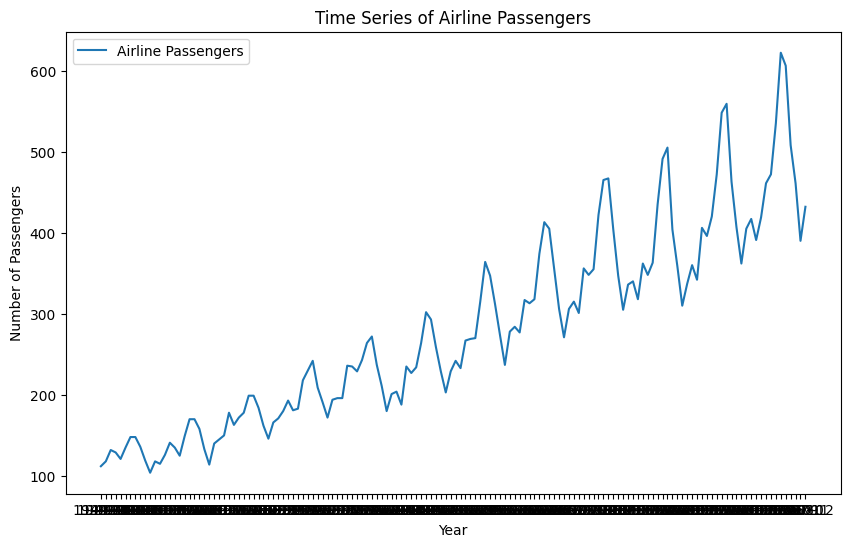

In [5]:
# EDA: Visualizing the Time Series Data
plt.figure(figsize=(10, 6))
plt.plot(data, label="Airline Passengers")
plt.title("Time Series of Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

In [6]:
# Stationarity Test: Augmented Dickey-Fuller (ADF) Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# Perform ADF test
adf_test(data)

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
The series is not stationary.


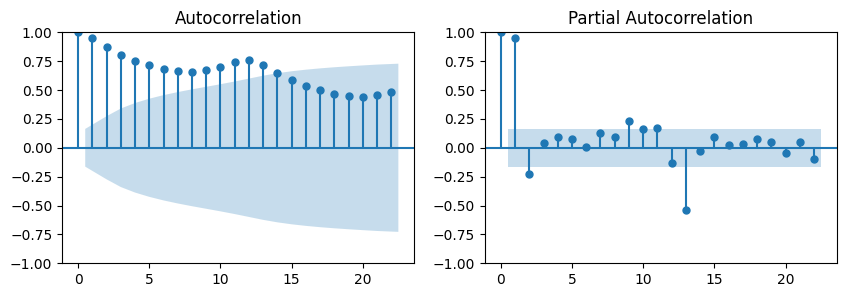

In [7]:
#ACF and PACF Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,ax=plt.subplots(1,2,figsize=(10,3))
plot_acf(data,ax=ax[0])
plot_pacf(data,ax=ax[1])
plt.show()

In [8]:
# AutoRegressive (AR) Model
model_ar = AutoReg(data, lags=2)
model_ar_fit = model_ar.fit()

#Moving Average (MA) Model
model_ma = ARIMA(data, order=(0, 0, 2))
model_ma_fit = model_ma.fit()
print ("InMA Hodel Summary: In", model_ma_fit. summary ())

#AutoRegressive Moving Average (ARMA) Model
model_arma = ARIMA(data, order=(2, 0, 2))
model_arma_fit = model_arma.fit()
print ("\nARMA Model Summary:\n", model_arma_fit. summary())

#AutoRegressive Integrated Moving Average (ARIMA) Model
model_arima =ARIMA(data, order=(2, 1,2))
model_arima_fit = model_arima.fit()
print ("\nARIMA Model Summary: \n", model_arima_fit.summary())

#Seasonal AutoRegressive Integrated Roving Average (SARIMA)
#The order argument should be a tuple, not a function call
model_sarima = SARIMAX(data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
print ("\nSARIMA Model Sumnary: \n", model_sarima_fit. summary ())

InMA Hodel Summary: In                                SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -757.063
Date:                Sun, 29 Jun 2025   AIC                           1522.126
Time:                        19:57:34   BIC                           1534.005
Sample:                    01-01-1949   HQIC                          1526.953
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.4095     14.386     19.491      0.000     252.213     308.606
ma.L1          1.3825     23.075      0.060      0.952     -43.844      46.609
ma.L2          1.0000     33.

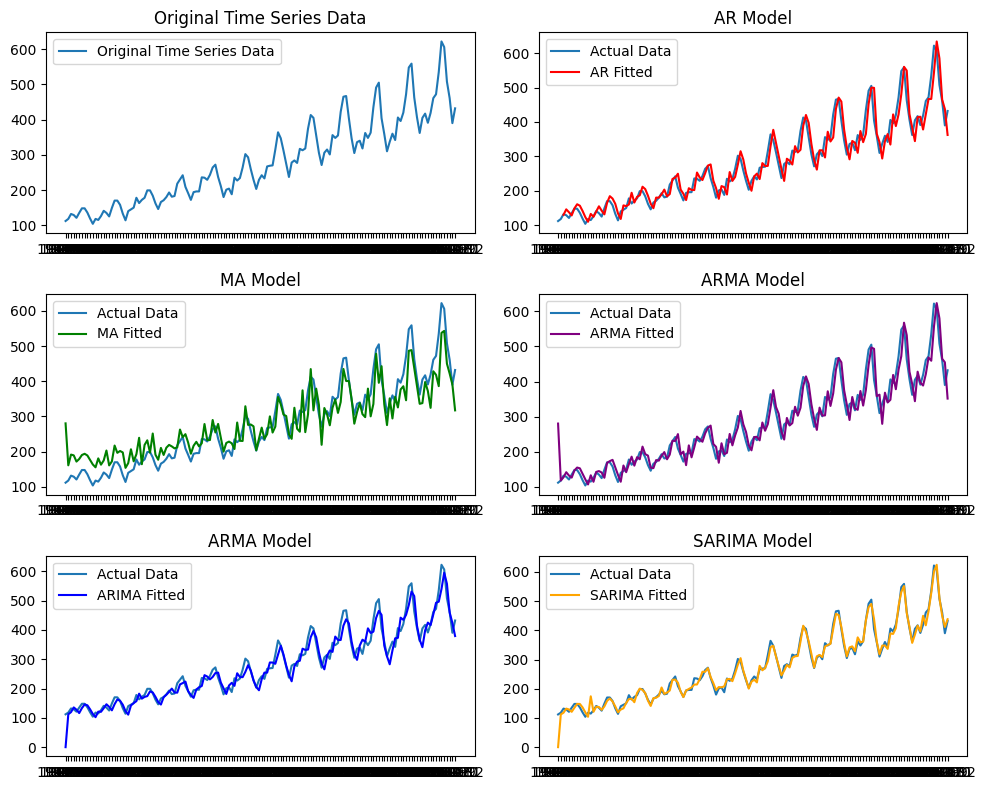

In [9]:
#Plot of the original time series data
plt.figure (figsize=(10, 8))
plt.subplot (3,2,1)
plt.plot(data, label="Original Time Series Data" )
plt.title("Original Time Series Data")
plt.legend()

#Plot for AutoRegressive (AR) Model
plt.subplot (3,2,2)
plt.plot(data, label="Actual Data")
plt.plot(model_ar_fit.fittedvalues, label="AR Fitted", color='red')
plt.title("AR Model") # Changed pit to plt
plt.legend()

#Plot for Moving Average (MA) Model
plt.subplot (3,2,3)
plt.plot(data,label="Actual Data")
plt.plot(model_ma_fit.fittedvalues, label="MA Fitted", color='green')
plt.title("MA Model")
plt.legend()

#Plot for  AutoRegressive Moving Average (ARMA) Model
plt.subplot (3,2,4)
plt.plot(data,label="Actual Data")
plt.plot(model_arma_fit.fittedvalues, label="ARMA Fitted", color='purple')
plt.title("ARMA Model")
plt.legend()

#Plot for  AutoRegressive Integrated Moving Average (ARIMA) Model
plt.subplot (3,2,5)
plt.plot(data,label="Actual Data")
plt.plot(model_arima_fit.fittedvalues, label="ARIMA Fitted", color='blue')
plt.title("ARMA Model") #This title is likely intended to be "ARIMA Model"
plt.legend()

#Plot for Seasonal AutoRegressive Moving Average (SARIMA) Model
plt.subplot (3,2,6)
plt.plot(data,label="Actual Data")
plt.plot(model_sarima_fit.fittedvalues, label="SARIMA Fitted", color='orange')
plt.title("SARIMA Model") #This title is likely intended to be "SARIMA Model"
plt.legend()

plt.tight_layout(pad=1.08)
plt.show()

In [10]:
#calculate errors
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE


#Calculate MAE and MAPE for AutoRegressive(AR) Model
ar_mae=MAE(data[2:],model_ar_fit.fittedvalues)
ar_mape=MAPE(data[2:],model_ar_fit.fittedvalues)
print("AR Model :MAE= ",ar_mae,", MAPE= ",ar_mape*100)

#Calculate MAE and MAPE for Moving Average(MA) Model
ma_mae=MAE(data,model_ma_fit.fittedvalues)
ma_mape=MAPE(data,model_ma_fit.fittedvalues)
print("MA Model :MAE= ",ma_mae,", MAPE= ",ma_mape*100)

#Calculate MAE and MAPE for AutoRegressive Moving Average(ARMA) Model
arma_mae=MAE(data,model_arma_fit.fittedvalues)
arma_mape=MAPE(data,model_arma_fit.fittedvalues)
print("ARMA Model :MAE= ",arma_mae,", MAPE= ",arma_mape*100)

#Calculate MAE and MAPE for AutoRegressive Integrated Moving Average(ARMA) Model
arima_mae=MAE(data,model_arima_fit.fittedvalues)
arima_mape=MAPE(data,model_arima_fit.fittedvalues)
print("ARIMA Model :MAE= ",arima_mae,", MAPE= ",arima_mape*100)

#Calculate MAE and MAPE for Seasonal Autoregressive Integrated Moving Model
sarima_mae=MAE(data,model_sarima_fit.fittedvalues)
sarima_mape=MAPE(data,model_sarima_fit.fittedvalues)
print("SARIMA Model :MAE= ",sarima_mae,", MAPE= ",sarima_mape*100)

AR Model :MAE=  24.695575487842074 , MAPE=  8.908088192488691
MA Model :MAE=  38.29072380009041 , MAPE=  16.656362921802526
ARMA Model :MAE=  24.695941240517186 , MAPE=  9.506848834395882
ARIMA Model :MAE=  20.847341606856947 , MAPE=  7.781852218708248
SARIMA Model :MAE=  9.705864262069774 , MAPE=  4.44314464838815


CONCLUSION
__________
This indicates **SARIMA Model is the best-performing model** for this dataset,as it has lowest errors,while the **MA Model performed the worst** due to its highest error values.This analysis is based on  **MAE(mean absolute error and MAPE(mean absolute percentage error)**.

                                                         *complted*